[ 0.10199363  0.05895149  0.18238789 50.41799032  3.19912075  0.05845746]


/home/giovanni/.local/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


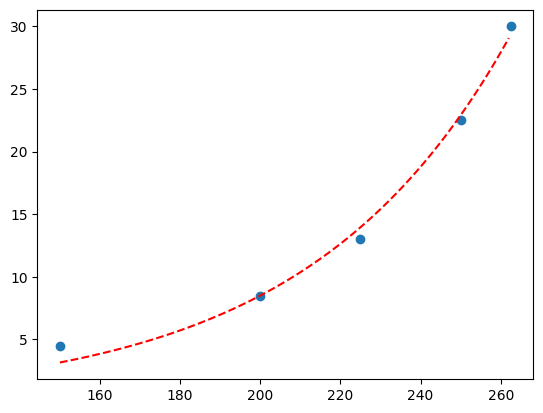

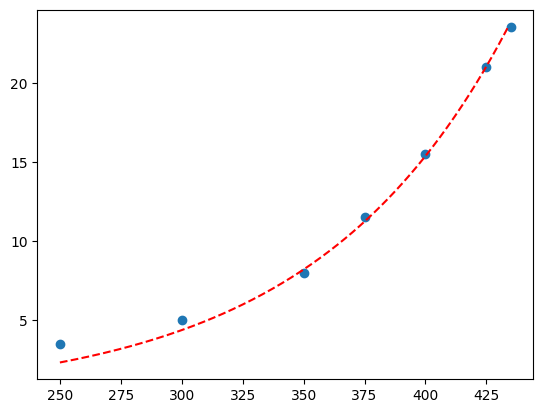

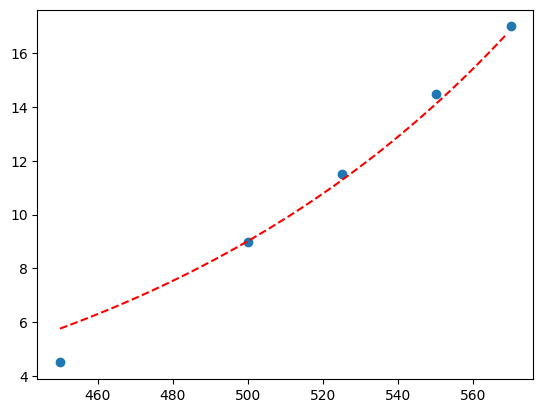

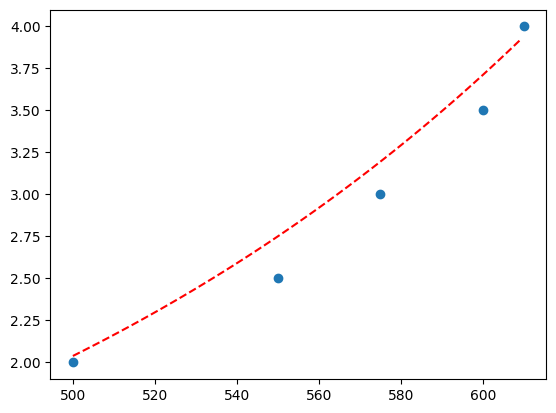

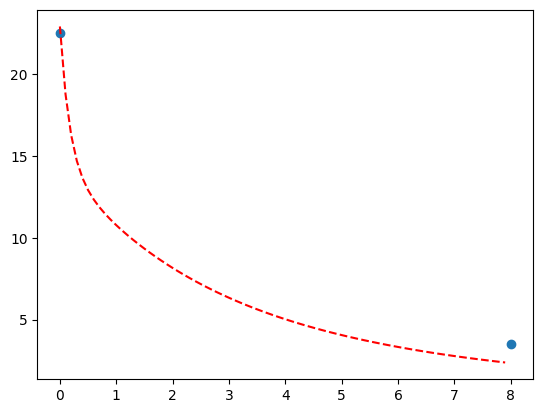

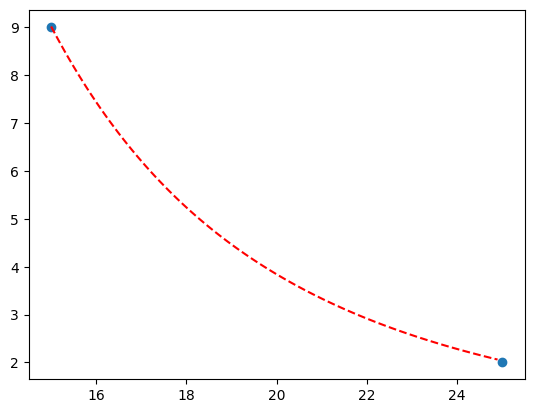

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from math import e
from matplotlib import pyplot
from numpy import arange

def chargeFunc(X, Q0, Q1, phi, nu, b, c):
    Volt, Phi = X
    return (Q0 + Q1 * e ** (-Phi/phi)) * e ** (Volt/(nu + b * Phi + c*Phi**2))

chargeData = np.array(
    [
        (150,   0,  4.5), # V, p/cm-2, fC
        (200,   0,  8.5),
        (225,   0, 13),
        (250,   0, 22.5),
        (262.5, 0, 30),
        #-----------------
        (250, 8,  3.5),
        (300, 8,  5),
        (350, 8,  8),
        (375, 8, 11.5),
        (400, 8, 15.5),
        (425, 8, 21),
        (435, 8, 23.5),
        #-----------------
        (450, 15,  4.5),
        (500, 15,  9),
        (525, 15, 11.5),
        (550, 15, 14.5),
        (570, 15, 17),
        #-----------------
        (500, 25,  2),
        (550, 25,  2.5),
        (575, 25,  3),
        (600, 25,  3.5),
        (610, 25,  4),
    ],
    dtype=[("V", "f"), ("Phi", "f"), ("Q", "f")]
)

chargeDF = pd.DataFrame(data=chargeData)


p0=[-0.03, 0.2, 30, 50, 1, -0.01]
popt, pcov = curve_fit(chargeFunc, (chargeDF['V'],chargeDF['Phi']), chargeDF['Q'], p0)

Q0, Q1, phi, nu, b, c = popt

print(popt)

phiVal = 0
x = chargeDF.loc[chargeDF['Phi'] == phiVal]["V"]
y = chargeDF.loc[chargeDF['Phi'] == phiVal]["Q"]
pyplot.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = [chargeFunc((x, phiVal), Q0, Q1, phi, nu, b, c) for x in x_line]
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

phiVal = 8
x = chargeDF.loc[chargeDF['Phi'] == phiVal]["V"]
y = chargeDF.loc[chargeDF['Phi'] == phiVal]["Q"]
pyplot.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = [chargeFunc((x, phiVal), Q0, Q1, phi, nu, b, c) for x in x_line]
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

phiVal = 15
x = chargeDF.loc[chargeDF['Phi'] == phiVal]["V"]
y = chargeDF.loc[chargeDF['Phi'] == phiVal]["Q"]
pyplot.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = [chargeFunc((x, phiVal), Q0, Q1, phi, nu, b, c) for x in x_line]
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

phiVal = 25
x = chargeDF.loc[chargeDF['Phi'] == phiVal]["V"]
y = chargeDF.loc[chargeDF['Phi'] == phiVal]["Q"]
pyplot.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = [chargeFunc((x, phiVal), Q0, Q1, phi, nu, b, c) for x in x_line]
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Vval = 250
x = chargeDF.loc[chargeDF['V'] == Vval]["Phi"]
y = chargeDF.loc[chargeDF['V'] == Vval]["Q"]
pyplot.scatter(x, y)
x_line = arange(min(x), max(x), 0.1)
y_line = [chargeFunc((Vval, x), Q0, Q1, phi, nu, b, c) for x in x_line]
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Vval = 500
x = chargeDF.loc[chargeDF['V'] == Vval]["Phi"]
y = chargeDF.loc[chargeDF['V'] == Vval]["Q"]
pyplot.scatter(x, y)
x_line = arange(min(x), max(x), 0.1)
y_line = [chargeFunc((Vval, x), Q0, Q1, phi, nu, b, c) for x in x_line]
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [2]:
sensorPositions = {
    "234": [
        [(11.86, -3.5)],
        [(11.86, -0.9),(11.86, -3.5),(11.86, -6.1)],
        [(11.86, -2.2),(11.86, -3.5),(11.86, -4.8)],
        [(11.86, -0.9),(11.86, -2.2),(11.86, -3.5),(11.86, -4.8),(11.86, -6.1)],
        [(11.86,  0.4),(11.86, -0.9),(11.86, -2.2),(11.86, -3.5),(11.86, -4.8),(11.86, -6.1),(11.86, -7.4)],
        [(11.86,  1.7),(11.86,  0.4),(11.86, -0.9),(11.86, -2.2),(11.86, -3.5),(11.86, -4.8),(11.86, -6.1),(11.86, -7.4),(11.86, -8.7)],
        [(11.86,  3.0),(11.86,  1.7),(11.86,  0.4),(11.86, -0.9),(11.86, -2.2),(11.86, -3.5),(11.86, -4.8),(11.86, -6.1),(11.86, -7.4),(11.86, -8.7),(11.86, -10.0)],
        [
            (11.86, -1.2 -  0*0.325),
            (11.86, -1.2 -  1*0.325),
            (11.86, -1.2 -  2*0.325),
            (11.86, -1.2 -  3*0.325),
            (11.86, -1.2 -  4*0.325),
            (11.86, -1.2 -  5*0.325),
            (11.86, -1.2 -  6*0.325),
            (11.86, -1.2 -  7*0.325),
            (11.86, -1.2 -  8*0.325),
            (11.86, -1.2 -  9*0.325),
            (11.86, -1.2 - 10*0.325),
            (11.86, -1.2 - 11*0.325),
            (11.86, -1.2 - 12*0.325),
            (11.86, -1.2 - 13*0.325),
            (11.86, -1.2 - 14*0.325),
            (11.86, -1.2 - 15*0.325),
        ]
    ],
}

In [3]:
import pps_hitmaps.PPSHitmap as PPSHitmap

hitmap = PPSHitmap("MarioHitmaps/map234-physicswithBG.out", "234", 6.6,
                                yMin=-0.025,
                                yMax=0.025,
                                xMax=0.025,
                                #minFlux=1e15# p/(cm^2 * fb-1)
                                )

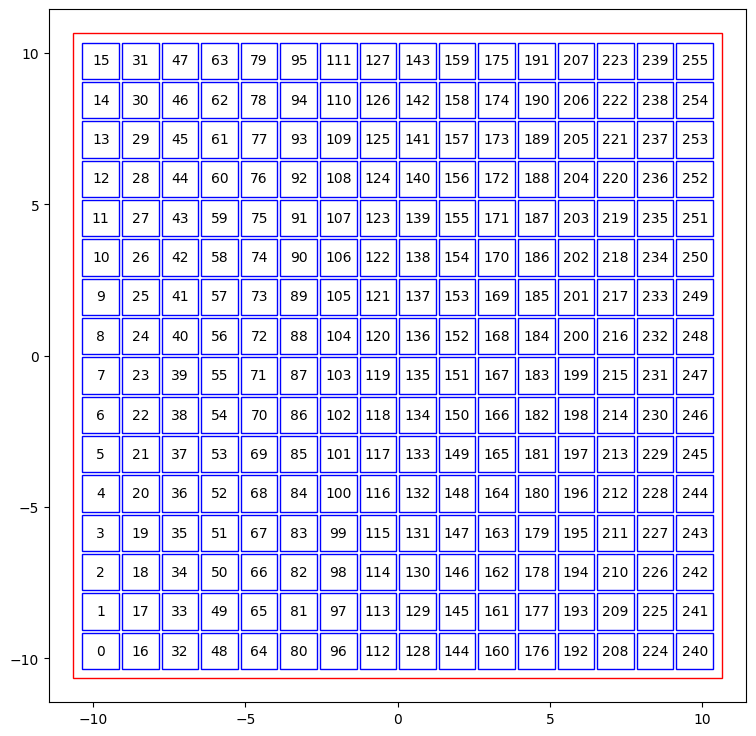

In [4]:
from pps_hitmaps.CustomizedSensors import RealisticETLSensor
sensor = RealisticETLSensor()
fig = sensor.preview()

In [10]:
shift = 1.3/2
sensor.setShifts(sensorPositions["234"][7])

In [11]:
sensor.calculateFlux(hitmap)

Integrated luminosity = 60.0 fb^-1, voltage min/max: 261 / 330
Integrated luminosity = 120.0 fb^-1, voltage min/max: 296 / 353
Integrated luminosity = 180.0 fb^-1, voltage min/max: 336 / 367
Integrated luminosity = 240.0 fb^-1, voltage min/max: 383 / 414
Integrated luminosity = 300.0 fb^-1, voltage min/max: 436 / 443


Warning in <TCanvas::Constructor>: Deleting canvas with same name: volt vs lumi


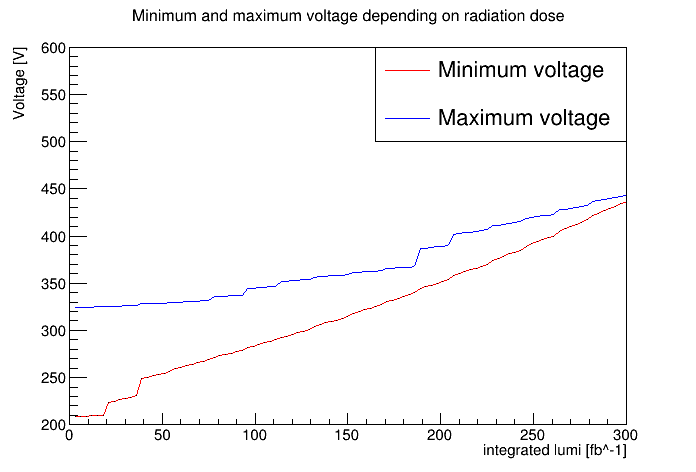

In [15]:
from ROOT import TCanvas, TGraph, TMultiGraph, TLegend, TLine
import numpy as np
from Colours import *

def VoltFunc(Volt, Phi):
    return chargeFunc((Volt, Phi/1e14), Q0, Q1, phi, nu, b, c)

NumberofPoints=100

lumi=np.zeros(NumberofPoints)
minVolt=np.zeros(NumberofPoints)
maxVolt=np.zeros(NumberofPoints)

overflow=False

minV=0
maxV=0

overflowlumi=9999.

for i in range(1,NumberofPoints+1):
    lastminV=minV
    lastmaxV=maxV
    currentlumi=300*i/NumberofPoints
    sensor.padVec[8].calculatepartialFlux(sensor.shifts,currentlumi, hitmap)
    minV, maxV = sensor.padVec[8].getVoltageEOL(chargeFunc=VoltFunc, usePadSpacing=False, integratedLuminosity=currentlumi)#, numberofPads=64)#, chargeDF=chargeDF)
    if minV>maxV and not overflow:
        overflow=True
        overflowlumi=(currentlumi*(lastmaxV-lastminV)+lumi[i-2]*(minV-maxV))/(minV-lastminV-maxV+lastmaxV)
        print(Red("Incompatible voltages above "+str(overflowlumi)+" fb^-1"))
    if(not currentlumi%60):
        print("Integrated luminosity = "+str(currentlumi)+" fb^-1, voltage min/max: {} / {}".format(minV, maxV))
    lumi[i-1]=currentlumi
    minVolt[i-1]=minV
    maxVolt[i-1]=maxV
    
canv= TCanvas("volt vs lumi","volt vs lumi")    
    
voltmingraph = TGraph(NumberofPoints,lumi,minVolt)
voltmaxgraph = TGraph(NumberofPoints,lumi,maxVolt)
voltmingraph.SetTitle("Minimum and maximum voltage depending on radiation dose")
voltmingraph.GetXaxis().SetTitle("integrated lumi [fb^-1]")
voltmingraph.GetYaxis().SetTitle("Voltage [V]")
voltmingraph.GetYaxis().SetRangeUser(200,600)
voltmaxgraph.GetYaxis().SetRangeUser(200,600)
voltmingraph.GetXaxis().SetRangeUser(0,300)
voltmaxgraph.GetXaxis().SetRangeUser(0,300)
voltmingraph.SetLineColor(632)
voltmaxgraph.SetLineColor(600)
voltmingraph.Draw("")
voltmaxgraph.Draw("same")
legend = TLegend(0.54,0.70,0.9,0.9);
legend.AddEntry(voltmingraph,"Minimum voltage","l");
legend.AddEntry(voltmaxgraph,"Maximum voltage","l");
legend.Draw("same");

line = TLine(overflowlumi,200,overflowlumi,500)
line.SetLineColor(30)
line.SetLineStyle(9)
line.Draw()

canv.Draw()

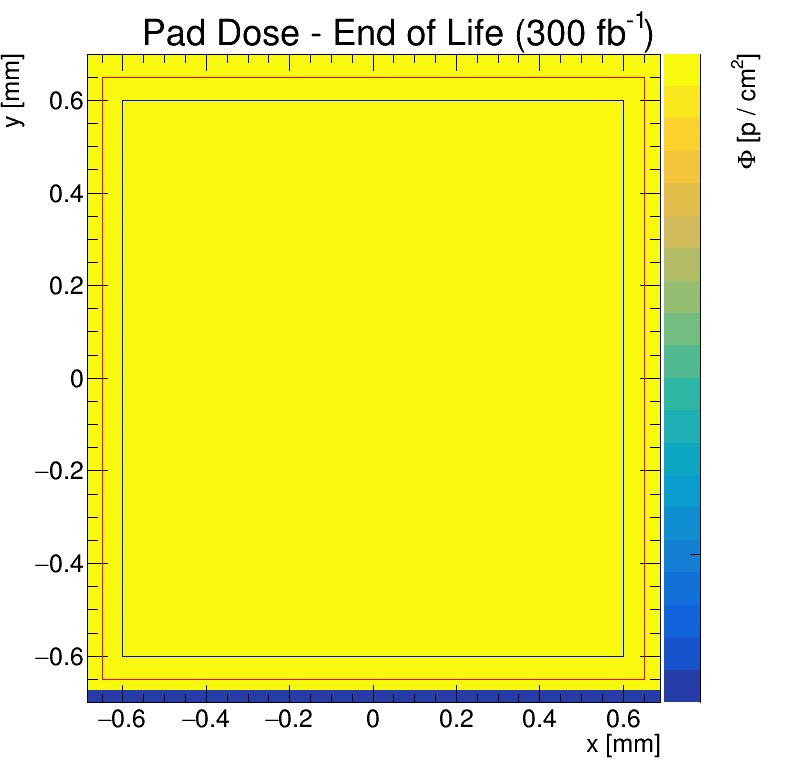

In [8]:
canv, persistance = sensor.padVec[32].plotDoseEOL(usePadSpacing=False)

canv.Draw()